In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:

df=pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [22]:

BMI=df['weight']/((df['height']/100)**2)
df['over_weight']=(BMI>25).astype(int)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,over_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


In [25]:

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

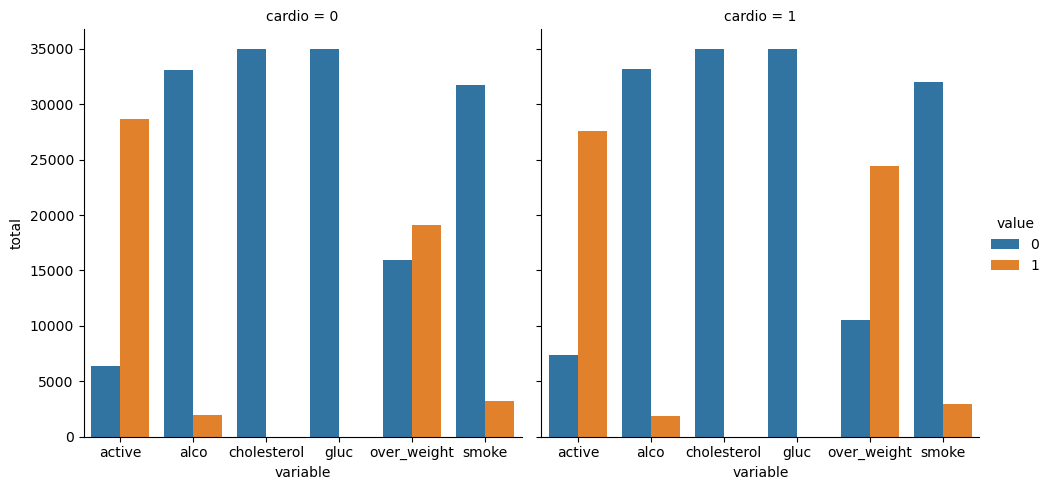

In [39]:

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'over_weight'])
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

catplot = sns.catplot(
        data=df_cat,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar'
    )
fig = catplot.fig

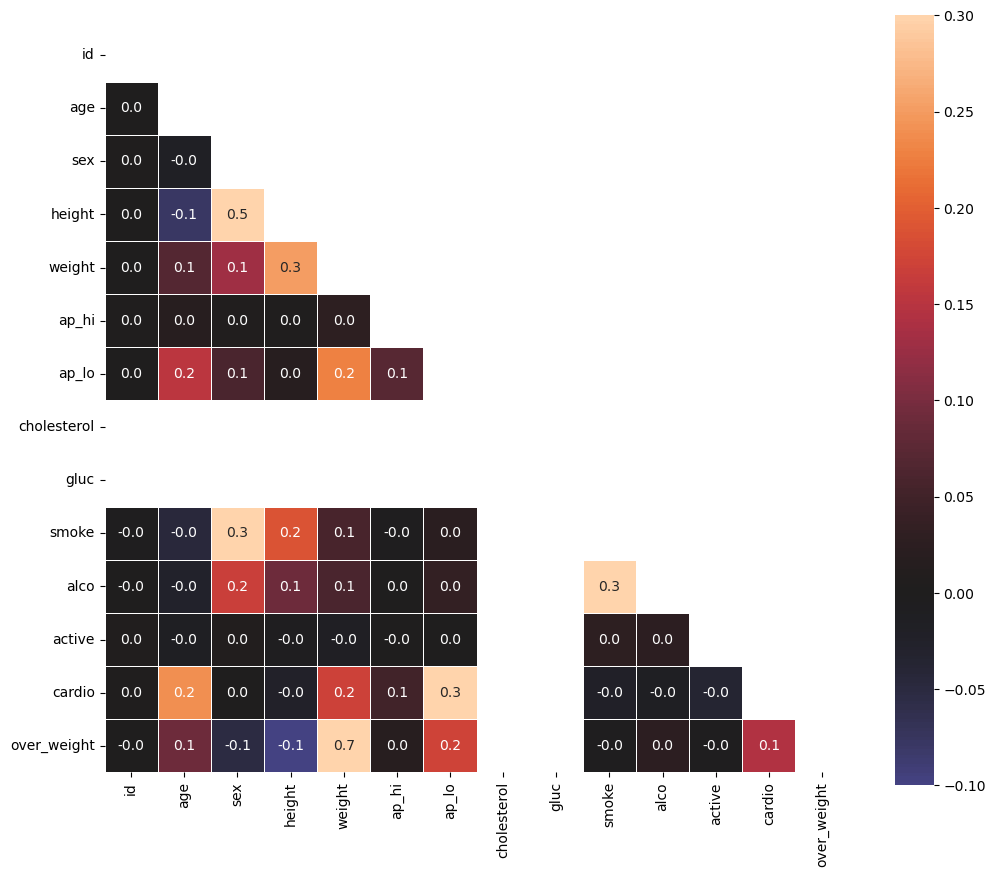

In [34]:
# Clean data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975))]

# Correlation matrix
corr = df_heat.corr()

# Mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, vmax=0.3, vmin=-0.1, square=True, linewidths=.5)
plt.show()


============================= test session starts =============================
platform win32 -- Python 3.13.5, pytest-8.3.4, pluggy-1.5.0 -- C:\Users\arsha\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\arsha
plugins: anyio-4.7.0
collecting ... collected 0 items

============================ no tests ran in 0.02s ============================


ERROR: file or directory not found: test_module.py

